# 5000 Songs Clustering

In [1]:
import pandas as pd
import csv
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [2]:
# WRITE YOUR LOCAL PATH HERE

songs=pd.read_csv("/Users/Priyatam/Documents/Data Science/Machine Learning/Unsupervised ML/df_audio_features_5000")

In [3]:
#  Columns are corrupted with blank spaces
print(songs.columns)

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [4]:
# Deleting the white spaces
songs.columns = songs.columns.str.strip()
print(songs.columns)

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')


In [5]:
#Changing index to name and artist (so all columns are numeric)
songs.set_index(['name', 'artist', "id"], inplace=True)

In [6]:
# Dropping columns that are not needed & are not numeric
songs.drop(columns=["type", "html"], inplace=True)

In [7]:
songs = songs.drop_duplicates()

In [8]:
#Checking if there are missing values
songs.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5160 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ', '1n7JnwviZ7zf0LR1tcGFq7 ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ', '7E1ErYYCn0lYjHODZ1qGuB ')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5160 non-null   float64
 1   energy            5160 non-null   float64
 2   key               5160 non-null   int64  
 3   loudness          5160 non-null   float64
 4   mode              5160 non-null   int64  
 5   speechiness       5160 non-null   float64
 6  

# Which features are worth keeping?  (PCA Analysis to reduce dimensionality)

In [9]:
# Normalize the data
scaler = MinMaxScaler()
songs_scaled = scaler.fit_transform(songs)

In [10]:
from sklearn.decomposition import PCA
# Make the PCA analysis
pca = PCA()
X_pca = pca.fit_transform(songs_scaled)

# Shows the variance explained by each principal component.
print("Variance explained for each principal component:")
print(pca.explained_variance_ratio_)

# Shows the cumulative variance explained
print("\nCumulative variance explained by the principal components:")
print(pca.explained_variance_ratio_.cumsum())

Variance explained for each principal component:
[0.27967646 0.26115318 0.18442391 0.11381237 0.06088361 0.0275501
 0.02256701 0.01772306 0.01493055 0.00742967 0.00597472 0.00252749
 0.00134788]

Cumulative variance explained by the principal components:
[0.27967646 0.54082963 0.72525354 0.83906591 0.89994952 0.92749961
 0.95006662 0.96778968 0.98272023 0.9901499  0.99612463 0.99865212
 1.        ]


# 5 components explain 90% of the varianze

Danceability → Principal component to determine the mood

Energy → So similar to danceability loudness

Speechines→ We dont hvae audio books or podcasts

Accousticness→ 1.0 = guitar, drums 0.0 = electronic. Can be very significant to show old vs new

Instrumentalness → 1.0 = No vocals 0.0 =rap Very significant aswell to determine background/melodic music vs only sing

Liveness -> It doesnt matter to us

Valence→ 1.0 = Happy songs 0= Melancholic

Tempo → 1.0= fast 0=reggae, slow (marley, notourius big)

In [11]:
# Transform the scaled values into a dataframe, copying the indexes and column names
songs_reduced = pd.DataFrame(songs_scaled, index= songs.index, columns= songs.columns)

In [ ]:
# What does it mean fit_transform?
asongs1_sk_pre = MinMaxScaler().fit_transform(asongs1)
pd.DataFrame(asongs1_sk_pre, columns=asongs1.columns, index=asongs1.index)

In [50]:
#I choose the 5 components that I am more interested in
songs_reduced = songs_reduced[["danceability", "acousticness", "instrumentalness", "valence", "tempo"]]

In [51]:
songs_reduced

,,,danceability,acousticness,instrumentalness,valence,tempo
name,artist,id,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.696787,0.000060,0.310660,0.515800
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.217871,0.000002,0.703553,0.584322
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.454819,0.000064,0.918782,0.437862
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,0.729059,0.882530,0.000041,0.531980,0.499098
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.919679,0.000348,0.408122,0.565171
...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,0.208893,0.920683,0.725888,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.858434,0.432487,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,0.061634,0.954819,0.983756,0.034924,0.334469


# Finding the right number of clusters

# Elbow method:

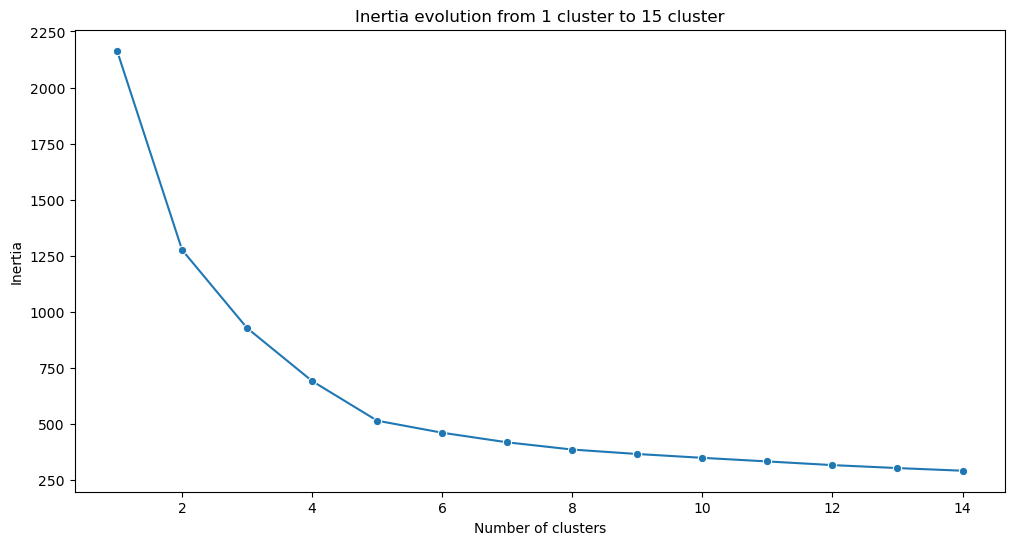

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

max_k = 15 # Maximum number of clusters, or playlists I want to create
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_reduced).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score

In [53]:
from sklearn.metrics import silhouette_samples
from matplotlib.cm import get_cmap
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

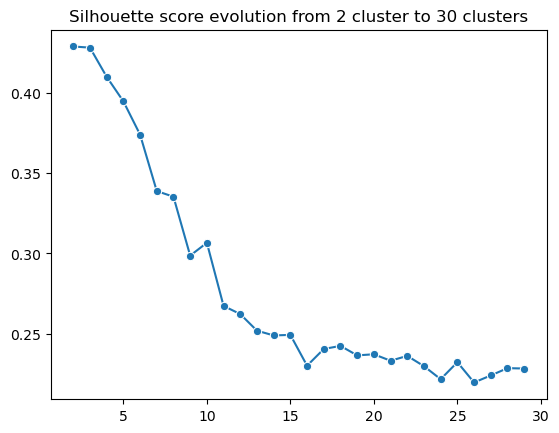

In [18]:
max_k = 30
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k, random_state=42).fit(songs_reduced).labels_
    sil_score.append(silhouette_score(songs_reduced, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()

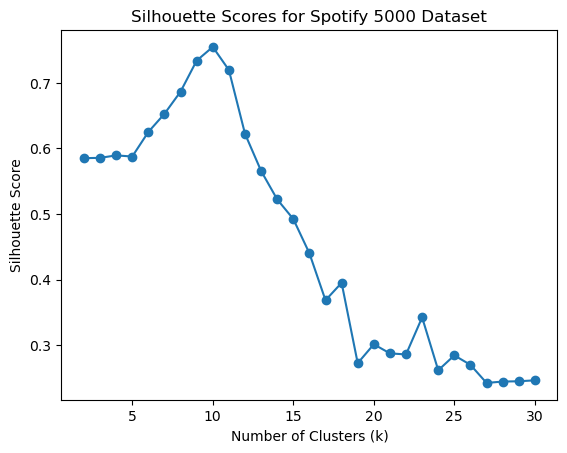

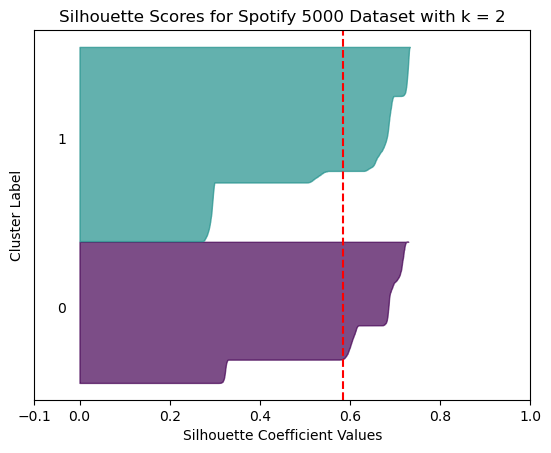

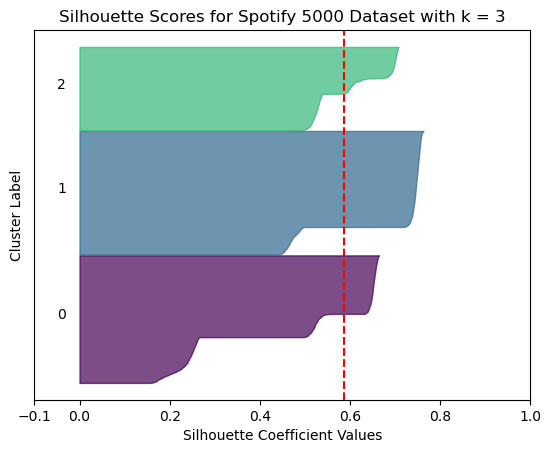

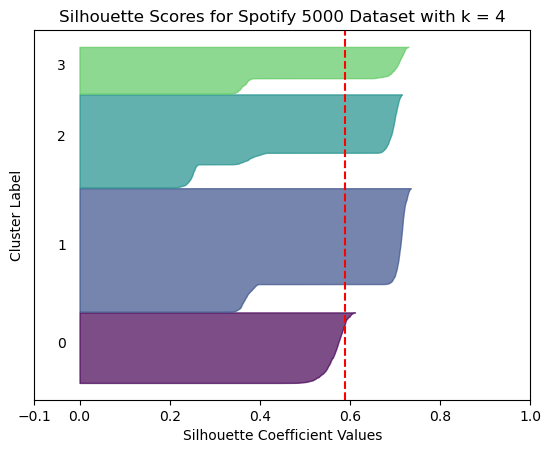

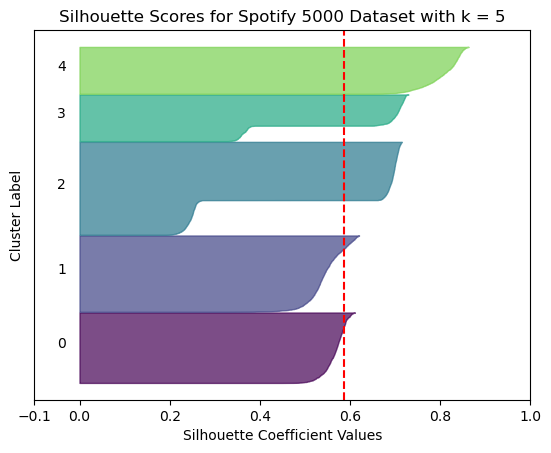

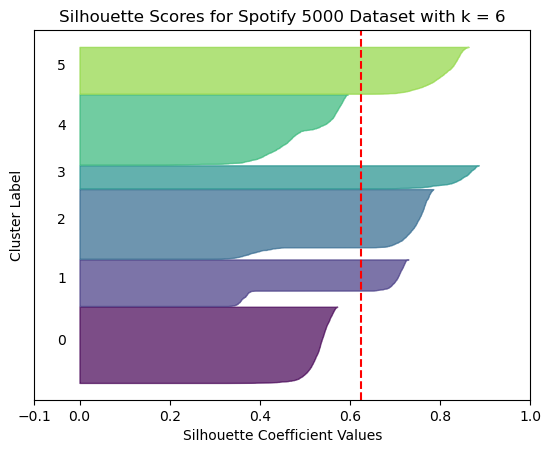

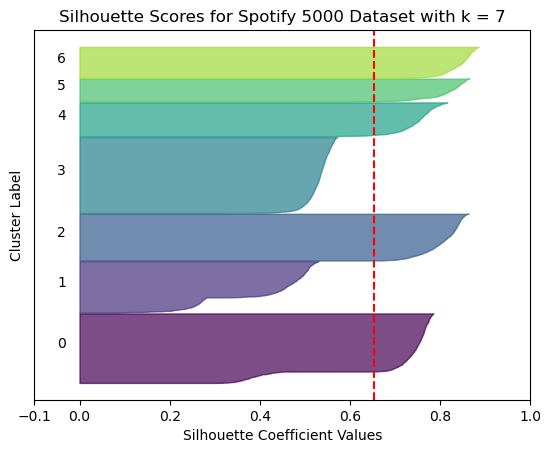

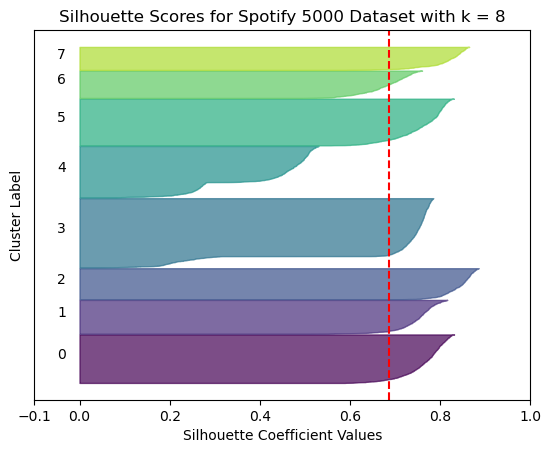

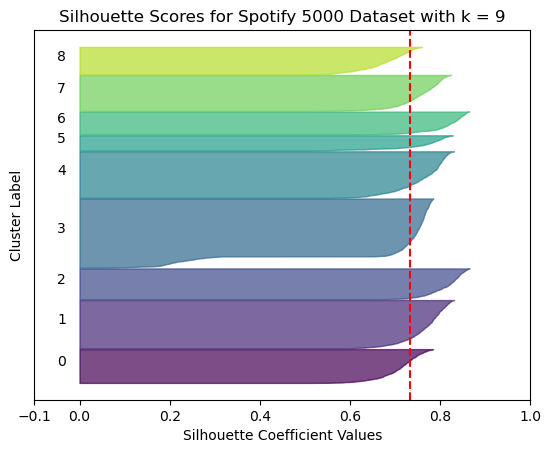

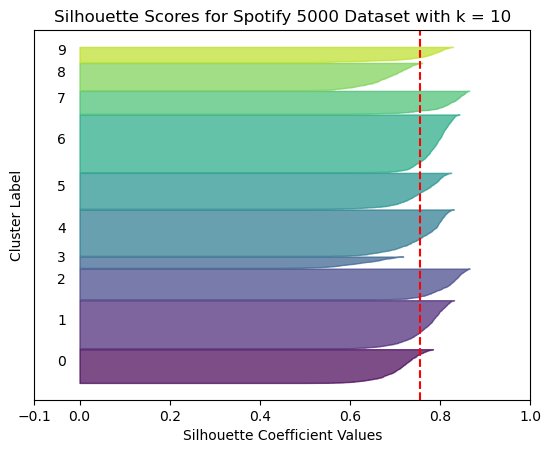

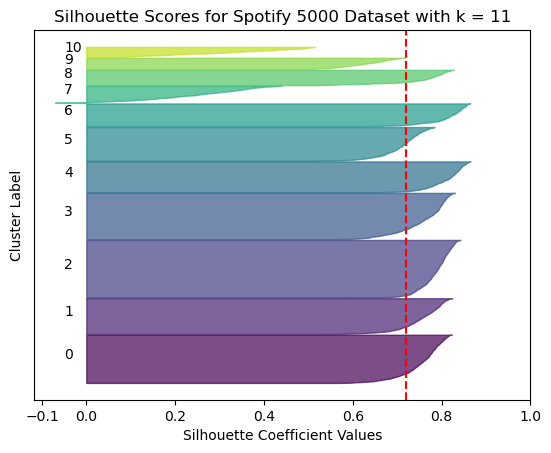

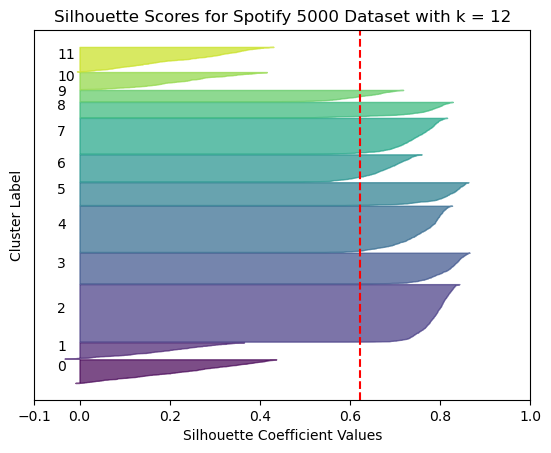

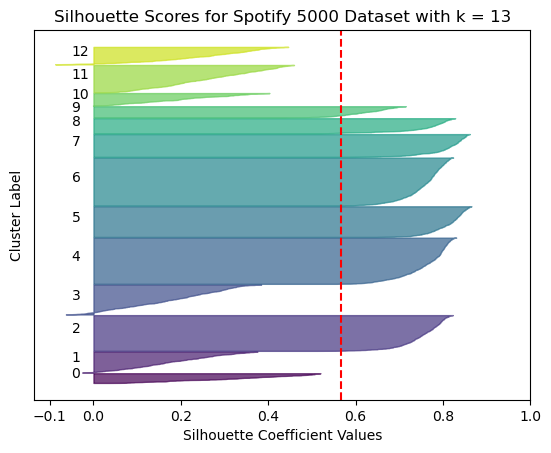

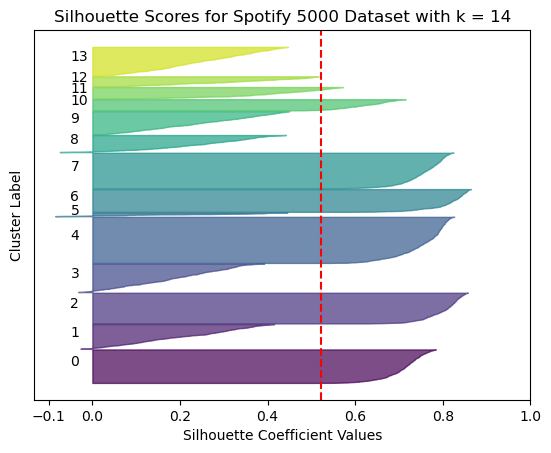

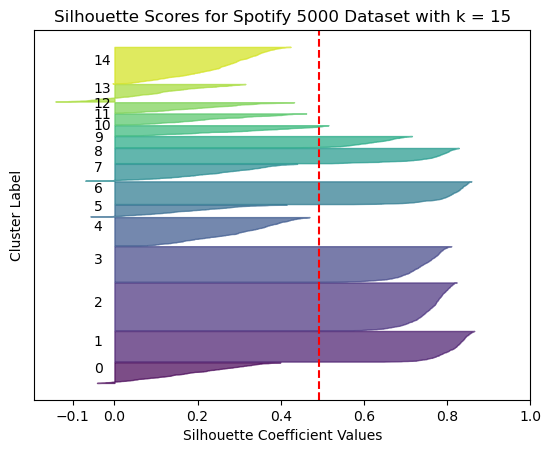

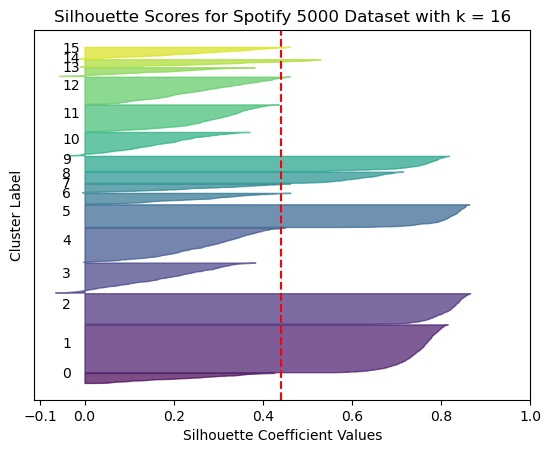

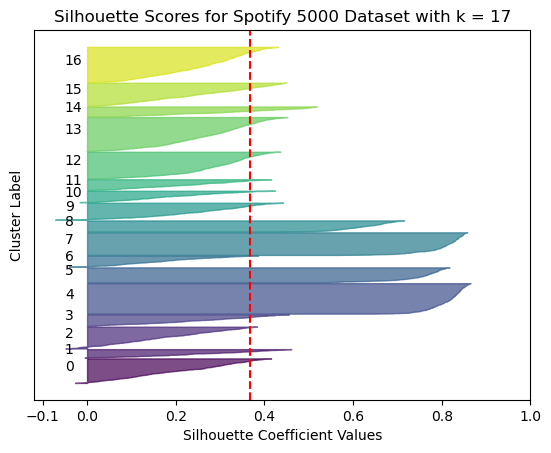

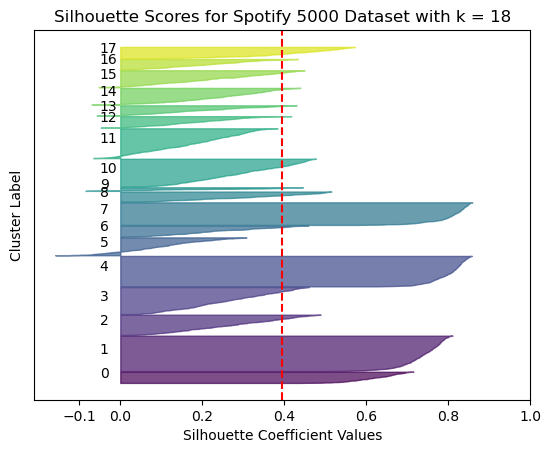

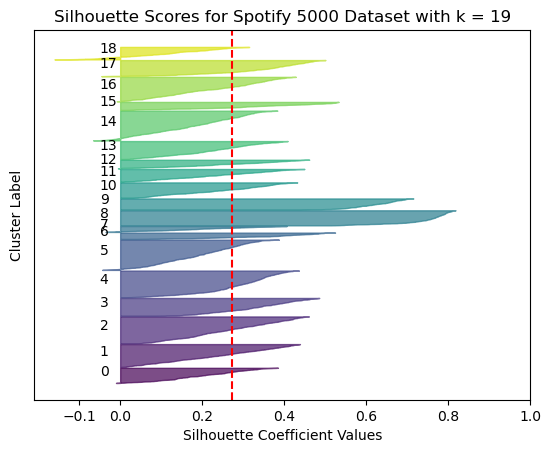

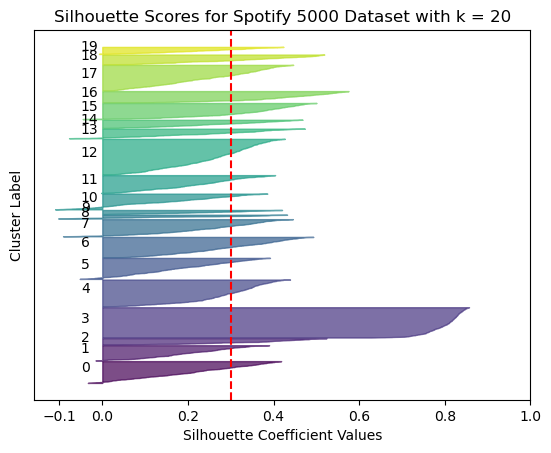

In [39]:
# This code provides a better visualisation of the knives chart


scaled_features = songs_reduced #StandardScaler().fit_transform(features) # or simply df

# Define a function to calculate k-means clustering and return silhouette score for different k values
def get_silhouette_score(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    return score

# Calculate silhouette scores for different k values
k_values = list(range(2, 31))
silhouette_scores = [get_silhouette_score(k, scaled_features) for k in k_values]

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Spotify 5000 Dataset")
plt.show()


def plot_silhouette_scores(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)

    # Compute silhouette scores for each sample
    sample_scores = silhouette_samples(features, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    cmap = get_cmap("viridis")

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to the same cluster and sort them
        ith_cluster_silhouette_values = sample_scores[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette Scores for Spotify 5000 Dataset with k = {}".format(k))
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # The vertical line for the average silhouette score of all the values
    ax.axvline(x=score, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Visualize the silhouette scores for different k values
for k in range(2, 21):
    plot_silhouette_scores(k, scaled_features)

   


# According to the analysis, 10 playlists make the most sense

In [54]:
# Add cluster column to the dataframe
# 1. import the model
from sklearn.cluster import KMeans

my_kmeans = KMeans(n_clusters= 10)
 
# 3. fit the model to the data
my_kmeans.fit(songs_reduced) # pass your scaled data here
 
# 4. obtain the cluster output
clusters = my_kmeans.predict(songs_reduced) # pass your scaled data here
 
# 5. attach the cluster output to our original DataFrame
songs_reduced["cluster"] = clusters

In [55]:
songs_reduced.groupby(by="cluster").mean()

,danceability,acousticness,instrumentalness,valence,tempo
cluster,,,,,
0,0.269138,0.007450,0.818717,0.218365,0.565378
1,0.563416,0.073517,0.022361,0.664181,0.658786
2,0.330498,0.942528,0.882763,0.164926,0.488427
3,0.668129,0.094639,0.014424,0.371364,0.549075
4,0.788033,0.125095,0.009845,0.797702,0.523694
5,0.574719,0.695774,0.034610,0.448872,0.547275
6,0.675472,0.579208,0.021215,0.807362,0.568707
7,0.351069,0.919008,0.052808,0.186884,0.492604
8,0.315111,0.021985,0.102626,0.200923,0.572329


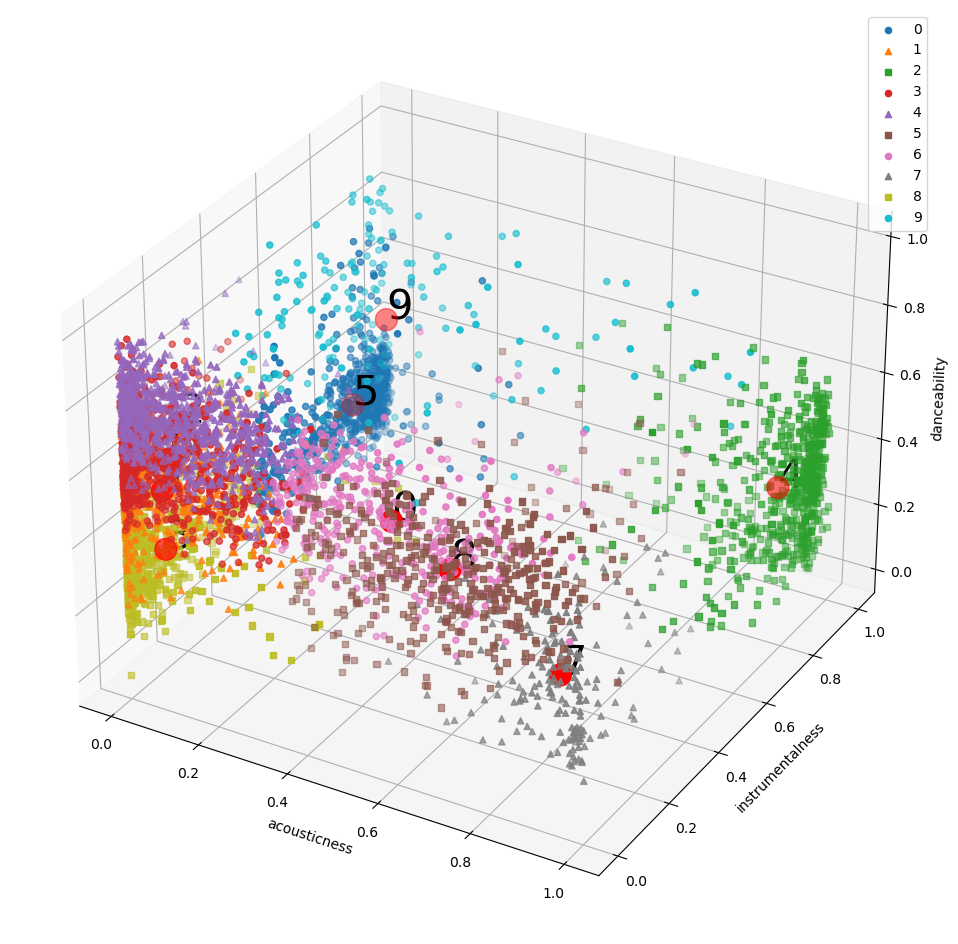

In [56]:
# Lets check in 3d their differences
import matplotlib.pyplot as plt
import random

temp_kmeans = KMeans(n_clusters=10).fit(songs_reduced)

centroids_temp = pd.DataFrame(temp_kmeans.cluster_centers_)

centroids_temp['cluster_name'] = centroids_temp.index




plot_data = songs_reduced
colors = ['r', 'g', 'b']
markers = ['o', '^', 's']

def get_marker(cluster_number):
    return markers[cluster_number % len(markers)]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for cluster, d in plot_data.groupby('cluster'):
    ax.scatter(d['acousticness'], d['instrumentalness'], d['danceability'], marker=get_marker(cluster), label=cluster)
ax.scatter(centroids_temp[1], centroids_temp[2], centroids_temp[0], color='red', s=250)

text_offset = 0.1

for i in range(centroids_temp.shape[0]):
    ax.text(
        x=centroids_temp[1][i], 
        y=centroids_temp[2][i],
        z=centroids_temp[0][i], 
        #s=f"C{centroids_temp['cluster_name'][i]}",
        s=centroids_temp["cluster_name"][i],
        size=30
    )


ax.set_xlabel('acousticness')
ax.set_ylabel('instrumentalness')  
ax.set_zlabel('danceability')  
plt.legend()
plt.show()

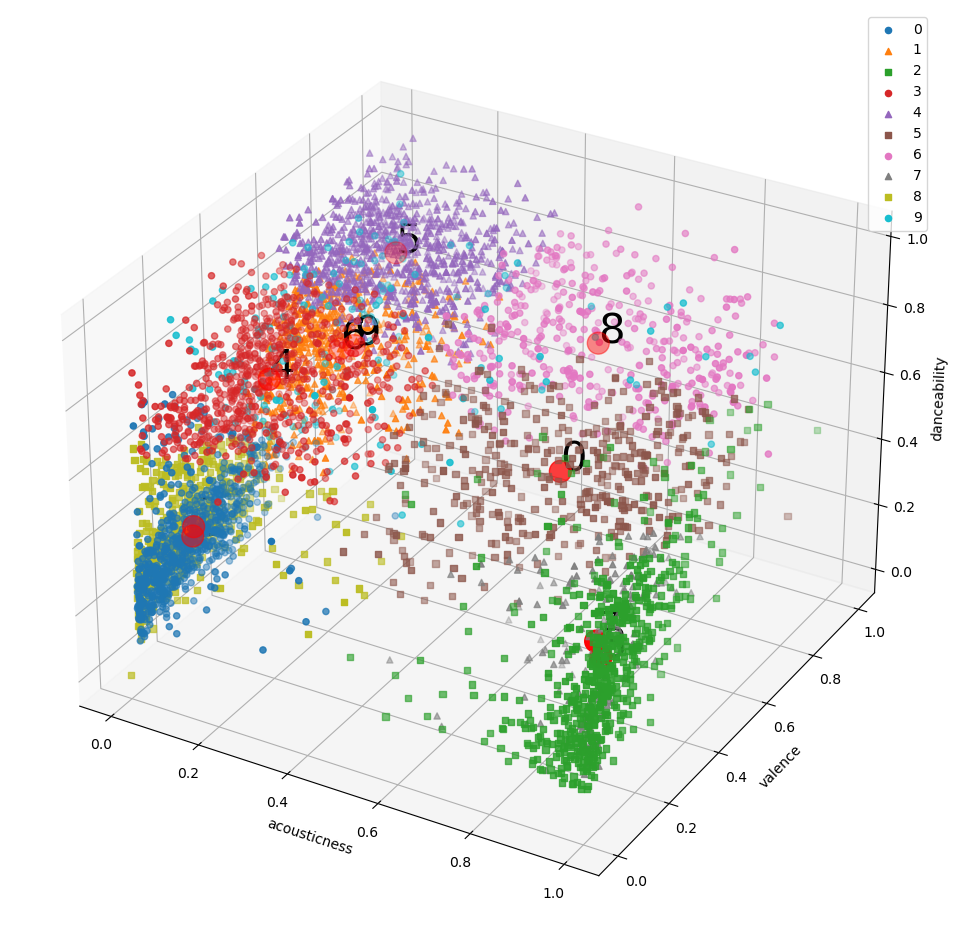

In [57]:
## Groups are not that obvious. Lets try with "valence" instead of intrumentalness

# Lets check in 3d their differences
import matplotlib.pyplot as plt
import random

temp_kmeans = KMeans(n_clusters=10).fit(songs_reduced)

centroids_temp = pd.DataFrame(temp_kmeans.cluster_centers_)
#, podria renombrar aqui en vez de interar con numeros ----centroids_temp.columns = columns
centroids_temp['cluster_name'] = centroids_temp.index




plot_data = songs_reduced
colors = ['r', 'g', 'b']
markers = ['o', '^', 's']

def get_marker(cluster_number):
    return markers[cluster_number % len(markers)]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for cluster, d in plot_data.groupby('cluster'):
    ax.scatter(d['acousticness'], d['valence'], d['danceability'], marker=get_marker(cluster), label=cluster)
ax.scatter(centroids_temp[1], centroids_temp[3], centroids_temp[0], color='red', s=250)

text_offset = 0.1

for i in range(centroids_temp.shape[0]):
    ax.text(
        x=centroids_temp[1][i], 
        y=centroids_temp[3][i],
        z=centroids_temp[0][i], 
        #s=f"C{centroids_temp['cluster_name'][i]}",
        s=centroids_temp["cluster_name"][i],
        size=30
    )


ax.set_xlabel('acousticness')
ax.set_ylabel('valence')  
ax.set_zlabel('danceability')  
plt.legend()
plt.show()

# Calculating distance

Calculate distances to the centroid of each feature, and then calculate total distance to the centroid.
Get the ~25 songs closest to the centroid and create playlist of them

In [58]:
#create a dataframe with the clusters centers
songs_reduced_2 = songs_reduced.drop(columns = ['cluster'])
songs_rdy_centroids = pd.DataFrame(my_kmeans.cluster_centers_, columns = songs_reduced_2.columns)
songs_rdy_centroids = songs_rdy_centroids.rename(columns=lambda x: x + '_centroid')
songs_rdy_centroids = songs_rdy_centroids.reset_index().rename(columns={'index': 'cluster'})

In [59]:
songs_rdy_centroids

,cluster,danceability_centroid,acousticness_centroid,instrumentalness_centroid,valence_centroid,tempo_centroid
0,0,0.269138,0.007450,0.818717,0.218365,0.565378
1,1,0.563416,0.073517,0.022361,0.664181,0.658786
2,2,0.330498,0.942528,0.882763,0.164926,0.488427
3,3,0.668129,0.094639,0.014424,0.371364,0.549075
4,4,0.788033,0.125095,0.009845,0.797702,0.523694
5,5,0.574719,0.695774,0.034610,0.448872,0.547275
6,6,0.675472,0.579208,0.021215,0.807362,0.568707
7,7,0.351069,0.919008,0.052808,0.186884,0.492604
8,8,0.315111,0.021985,0.102626,0.200923,0.572329
9,9,0.632059,0.139847,0.734671,0.611342,0.610117


In [60]:
songs_reduced

,,,danceability,acousticness,instrumentalness,valence,tempo,cluster
name,artist,id,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.696787,0.000060,0.310660,0.515800,5
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.217871,0.000002,0.703553,0.584322,4
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.454819,0.000064,0.918782,0.437862,6
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,0.729059,0.882530,0.000041,0.531980,0.499098,5
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.919679,0.000348,0.408122,0.565171,5
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,0.208893,0.920683,0.725888,0.066497,0.410795,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.858434,0.432487,0.036041,0.388495,7
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,0.061634,0.954819,0.983756,0.034924,0.334469,2


In [61]:
songs_rdy_with_centroids = (
    songs_reduced.reset_index()
    .merge(songs_rdy_centroids, on="cluster", how="left")
    .set_index(["name", "artist", "id"])
)

In [62]:
songs_rdy_with_centroids

,,,danceability,acousticness,instrumentalness,valence,tempo,cluster,danceability_centroid,acousticness_centroid,instrumentalness_centroid,valence_centroid,tempo_centroid
name,artist,id,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.696787,0.000060,0.310660,0.515800,5,0.574719,0.695774,0.034610,0.448872,0.547275
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.217871,0.000002,0.703553,0.584322,4,0.788033,0.125095,0.009845,0.797702,0.523694
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.454819,0.000064,0.918782,0.437862,6,0.675472,0.579208,0.021215,0.807362,0.568707
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,0.729059,0.882530,0.000041,0.531980,0.499098,5,0.574719,0.695774,0.034610,0.448872,0.547275
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.919679,0.000348,0.408122,0.565171,5,0.574719,0.695774,0.034610,0.448872,0.547275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,0.208893,0.920683,0.725888,0.066497,0.410795,2,0.330498,0.942528,0.882763,0.164926,0.488427
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.858434,0.432487,0.036041,0.388495,7,0.351069,0.919008,0.052808,0.186884,0.492604
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,0.061634,0.954819,0.983756,0.034924,0.334469,2,0.330498,0.942528,0.882763,0.164926,0.488427


In [63]:
closests_songs = (
songs_rdy_with_centroids
    .assign(
        distance = lambda x: (x['danceability'] - x['danceability_centroid'])**2 + (x['acousticness'] - x['acousticness_centroid'])**2 + (x['instrumentalness'] - x['instrumentalness_centroid'])**2 + (x['valence'] - x['valence_centroid'])**2 + (x['tempo'] - x['tempo_centroid'])**2
    )
    .groupby('cluster')
        # get top 5 songs with the smallest distance
    .apply(lambda x: x.nsmallest(25, 'distance'))
)

In [64]:
#Reset index without losing the id column
closests_songs = closests_songs.reset_index(level=0, drop=True).reset_index()

closests_songs

,name,artist,id,danceability,acousticness,instrumentalness,valence,tempo,cluster,danceability_centroid,acousticness_centroid,instrumentalness_centroid,valence_centroid,tempo_centroid,distance
0,Rotting Ways to Misery ...,Sentenced,6qU6Y4fqDJIF65erA3pga4,0.251293,0.000004,0.809137,0.246701,0.568293,0,0.269138,0.007450,0.818717,0.218365,0.565378,0.001277
1,Eyemaster ...,Entombed,5wkQ7sIvr7eigcWmrTjDiO,0.286453,0.000002,0.811168,0.222335,0.530740,0,0.269138,0.007450,0.818717,0.218365,0.565378,0.001628
2,Limb from Limb ...,Exhumed,6ElhqEkvahcWem7nqMfddM,0.240951,0.000011,0.858883,0.212183,0.560307,0,0.269138,0.007450,0.818717,0.218365,0.565378,0.002527
3,Foetal Carnage ...,Gorefest,32ry1GP8gI7cQCji6SZiRn,0.245088,0.000003,0.811168,0.258883,0.538460,0,0.269138,0.007450,0.818717,0.218365,0.565378,0.003057
4,The Stench Of Redemption ...,Deicide,1GQ53zFkceMExs9KXYd2Ul,0.273009,0.000046,0.854822,0.180711,0.546390,0,0.269138,0.007450,0.818717,0.218365,0.565378,0.003152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Greyhound ...,Swedish House Mafia,0VffaI2jwQknRrxpECYHsF,0.747673,0.006687,0.889340,0.547208,0.584027,9,0.632059,0.139847,0.734671,0.611342,0.610117,0.059815
246,Come Along ...,Ebo Taylor,0ofMkI3jzmGCElAOgOLeo3,0.713547,0.000233,0.750254,0.811168,0.597262,9,0.632059,0.139847,0.734671,0.611342,0.610117,0.066471
247,Rattle ...,Bingo Players,3uXzBSx2eMKRTEP46SZ2fC,0.769390,0.001526,0.897462,0.537056,0.598117,9,0.632059,0.139847,0.734671,0.611342,0.610117,0.070156
248,Step By Step - Big Room Mix ...,Laidback Luke,2BXxgxW9U3qdt81ackRLcJ,0.670114,0.000750,0.798985,0.396954,0.598177,9,0.632059,0.139847,0.734671,0.611342,0.610117,0.071037


# Now I have 25 songs for each of the 10 clusters. Lets create playlists!

In [67]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

# Authentication and obtaining access tokens

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='YOUR CLIENT ID',
                                               client_secret='YOUR CLIENT SECRET',
                                               redirect_uri='http://localhost',
                                               scope='playlist-modify-public',
                                               username='31km2vqvy7xkyc4f5kgrx23jnnfq'))

for i in range(10):
# Create a playlist
    playlist_name = f"Cluster {i}"
    playlist_description = f'A playlist created using Spotipy. This cluster has a danceability of {songs_rdy_centroids.loc[songs_rdy_centroids["cluster"] == i, "danceability_centroid"]} xd' #Why it doesnt work?
    new_playlist = sp.user_playlist_create(user="31km2vqvy7xkyc4f5kgrx23jnnfq",
                                        name=playlist_name,
                                        public=True,
                                        description=playlist_description)


    track_ids = closests_songs.loc[closests_songs["cluster"] == i, "id"].tolist()
    #Delete whitespaces from track_ids, that were causing an error
    track_ids = [track_id.strip() for track_id in track_ids]
    playlist_id = new_playlist['id']

    # Add songs to the playlist
    sp.playlist_add_items(playlist_id=playlist_id, items=track_ids)
   
    print(f"Songs sucessfully added to the playlist {playlist_name}")

Songs sucessfully added to the playlist Cluster 0
Songs sucessfully added to the playlist Cluster 1
Songs sucessfully added to the playlist Cluster 2
Songs sucessfully added to the playlist Cluster 3
Songs sucessfully added to the playlist Cluster 4
Songs sucessfully added to the playlist Cluster 5
Songs sucessfully added to the playlist Cluster 6
Songs sucessfully added to the playlist Cluster 7
Songs sucessfully added to the playlist Cluster 8
Songs sucessfully added to the playlist Cluster 9
